<a href="https://colab.research.google.com/github/thaohung13/AI_W10_8_4_2023/blob/main/Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
url = '/content/Housing.csv'
data = pd.read_csv(url, encoding = 'utf-8')
data.head()

# Preprocess the data
data.replace({'yes': 1, 'no': 0, 'furnished': 1, 'unfurnished': 0, 'semi-furnished': 2}, inplace=True)
X = data.drop('price', axis=1).values
y = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(381, 12) (164, 12) (381,) (164,)


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 100)               1300      
                                                                 
 dense_105 (Dense)           (None, 100)               10100     
                                                                 
 dense_106 (Dense)           (None, 100)               10100     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_107 (Dense)           (None, 1)                 101       
                                                                 
Total params: 21,601
Trainable params: 21,601
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 26428435333120.0000 - val_loss: 25754983202816.0000
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 26407786774528.0000 - val_loss: 25735269974016.0000
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 26385722638336.0000 - val_loss: 25707541430272.0000
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 26353376165888.0000 - val_loss: 25667714416640.0000
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 26307964436480.0000 - val_loss: 25609998696448.0000
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 26238630494208.0000 - val_loss: 25526666264576.0000
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 26130480365568.0000 - val_loss: 25409120894976.0000
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 25997049069568.0000 - val_loss: 25247474515968.0000
Epoch 9/1

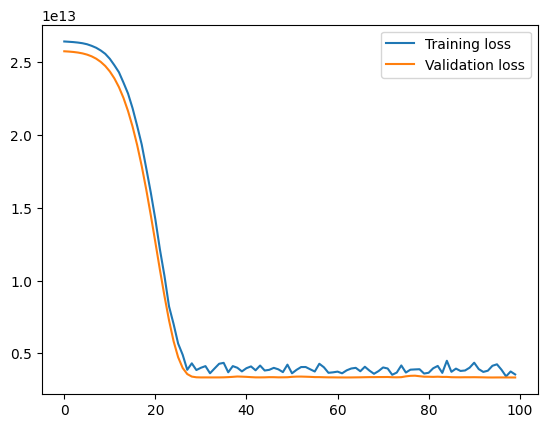

6/6 [==============================] - 0s 2ms/step
[[  153277.7   9701356.    3809883.2  14800468.     161008.72 14561756.
    164465.67   153828.31   177221.25 19801124.   10990032.     154442.27
    977197.4   4117150.5    725002.2    179647.77   298919.38   148583.42
    144414.81   151841.11 13335412.   18973056.    2104262.     172884.9
   6013935.5  11994304.   10024724.   10872284.   10303834.    8767680.
    155616.45 19843684.   20653334.     168576.1   6931535.    3269729.8
   9598608.     749080.7    170970.73  1461709.8  16319406.    2257268.5
   7767187.     153366.77   186673.5  10407308.    5422096.5    167336.11
   3034774.8  18255768.     145323.12 22173648.     158414.67   157407.36
    152889.7    666757.44  9768710.    1342620.1    158101.94   217862.7
   1963257.5  22983802.     178852.6  12339260.     173644.56  8083472.5
  16548566.     175897.9    149633.53  4186365.    2348906.8  20888346.
   6361666.5  16043268.    4326249.    8821830.     162242.4  16577998.


In [50]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(12, )))
model.add(tf.keras.layers.Dense(100, activation= 'relu'))
model.add(tf.keras.layers.Dense(100, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.summary()

# compile model
adam = tf.keras.optimizers.Adam(lr=0.002)
model.compile(optimizer = adam, loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.3)
model.save('house_model.h5')

#evaluate model
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

#predict model
X_test1 = np.array([7000,3,3,2,1,0,0,1,1,2,0,1]).reshape(-1,1)
scaler1 = StandardScaler()
X_test1_scaled = scaler1.fit_transform(X_test1)

# Evaluate the model's performance
y_pred_1 = model.predict(X_test_std).reshape(1,-1)
y_pred_1 = scaler1.inverse_transform(y_pred_1)
print(y_pred_1)